In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from pathlib import Path


In [22]:
from pathlib import Path

# Your exact dataset path (original images)
dataset_path = Path(r"C:\Users\Danidu Wijesinghe\Desktop\IT24100858\Tea Leaf Disease Dataset")

if not dataset_path.exists():
    raise FileNotFoundError(f"Dataset path does not exist: {dataset_path}")

print(f"Using dataset path: {dataset_path}")

# List all category folders inside the dataset
valid_categories = [folder.name for folder in dataset_path.iterdir() if folder.is_dir()]

print("Found categories:")
print(valid_categories)



Using dataset path: C:\Users\Danidu Wijesinghe\Desktop\IT24100858\Tea Leaf Disease Dataset
Found categories:
['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']


In [23]:
print("\n" + "=" * 50)
print("IMAGE NORMALIZATION STARTED")
print("=" * 50)


def normalize_image(img):
    """Normalize pixel values from [0, 255] to [0, 1]."""
    return img.astype(np.float32) / 255.0


normalized_images = {}

for category in valid_categories:
    folder = dataset_path / category
    image_files = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    normalized_images[category] = []

    for file in image_files[:5]:  # Limit to 5 images per category for quick preview
        img_path = folder / file
        img = cv2.imread(str(img_path))
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_norm = normalize_image(img_rgb)
            normalized_images[category].append((file, img_rgb, img_norm))

print(f"✅ Normalized sample images from {len(valid_categories)} categories.")



IMAGE NORMALIZATION STARTED
✅ Normalized sample images from 6 categories.



Visualizing pixel distributions before and after normalization...


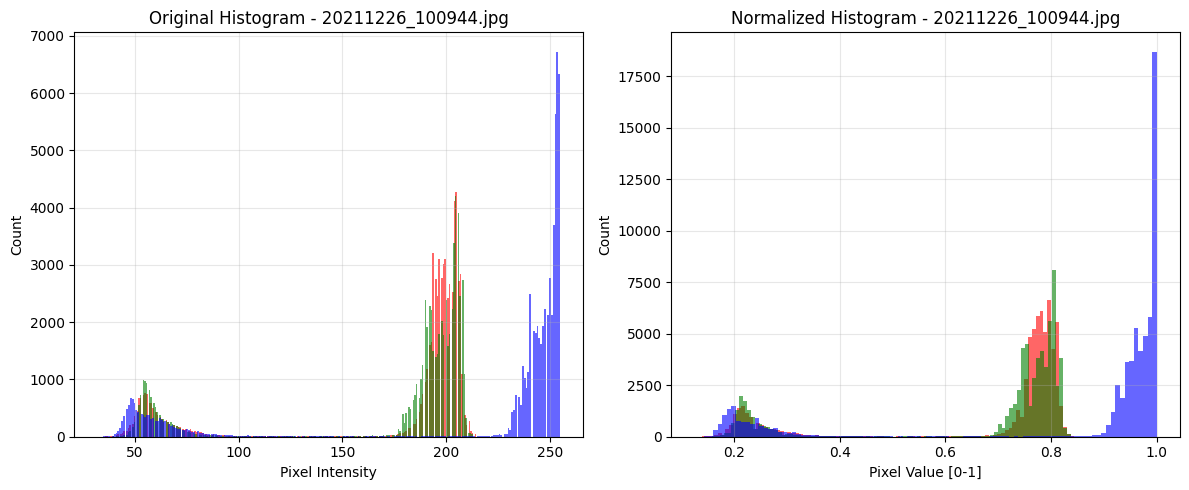

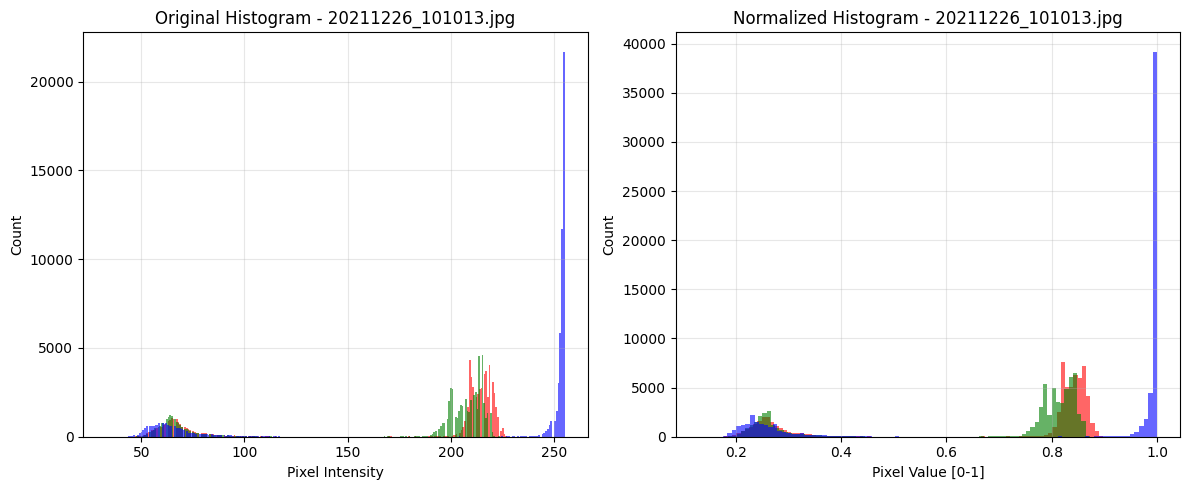

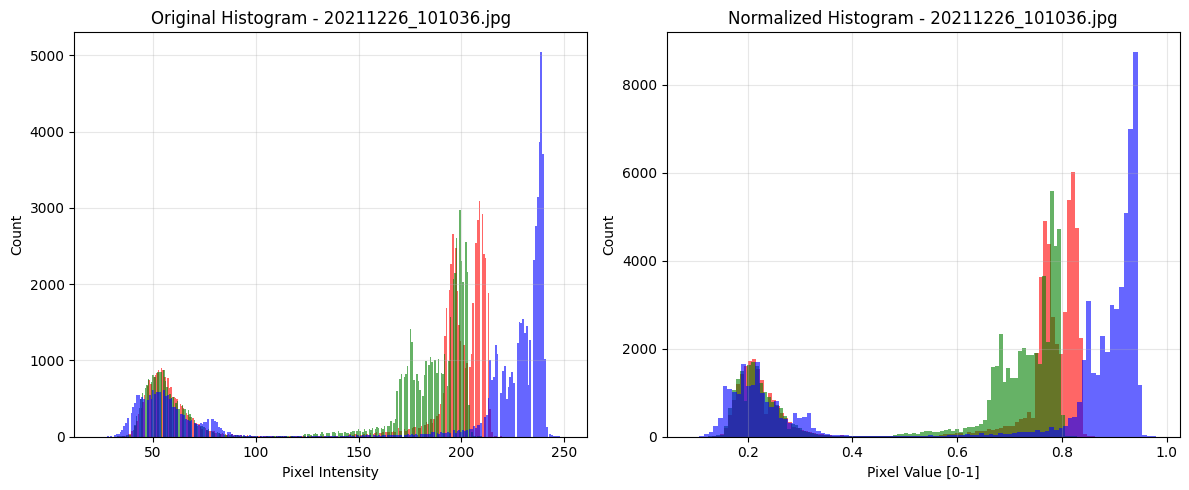

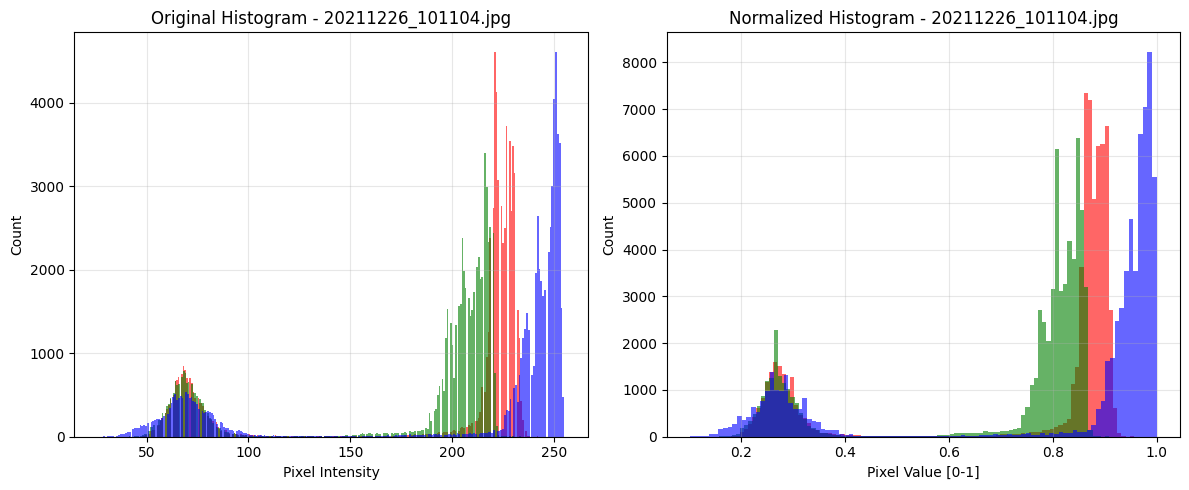

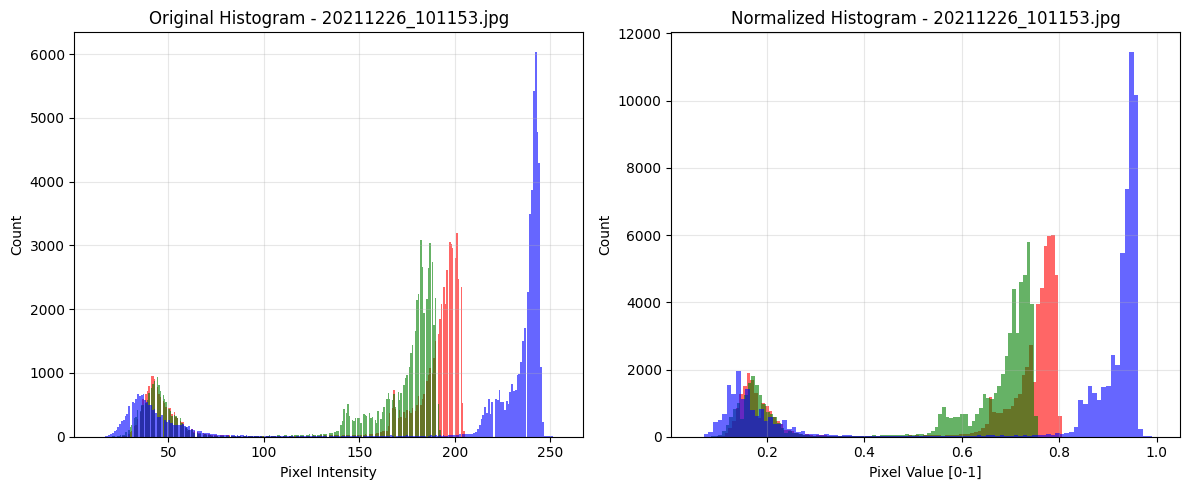

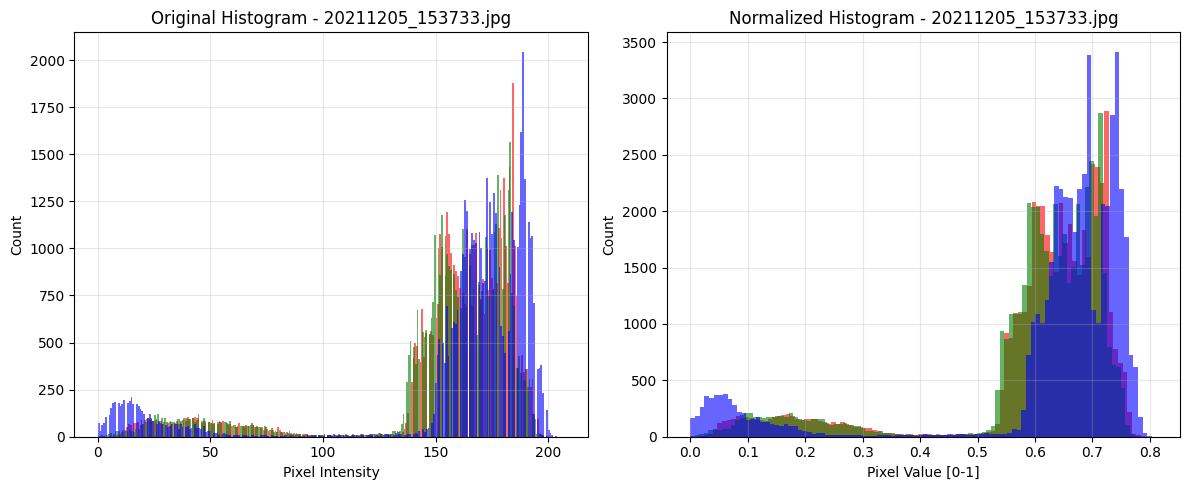

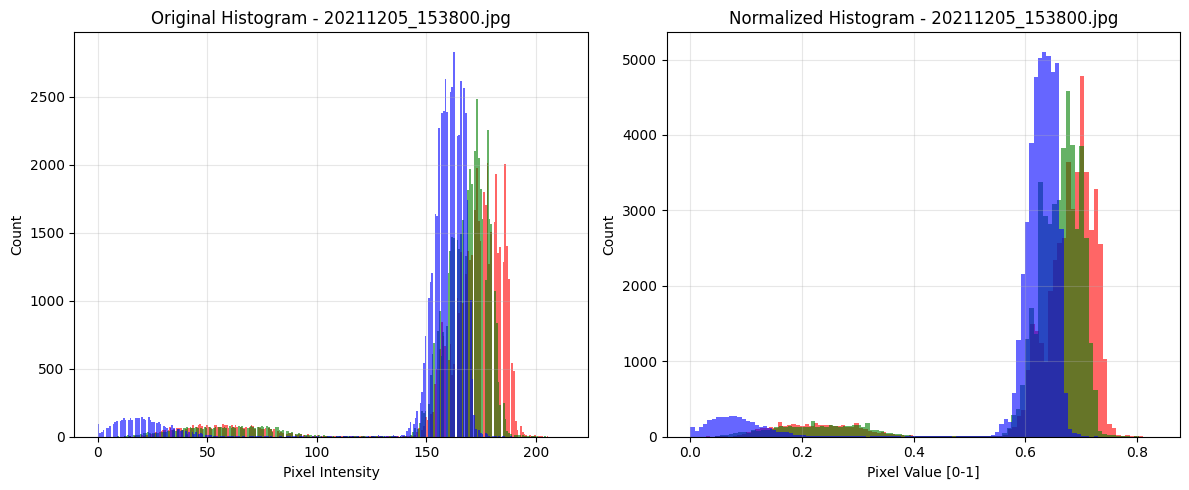

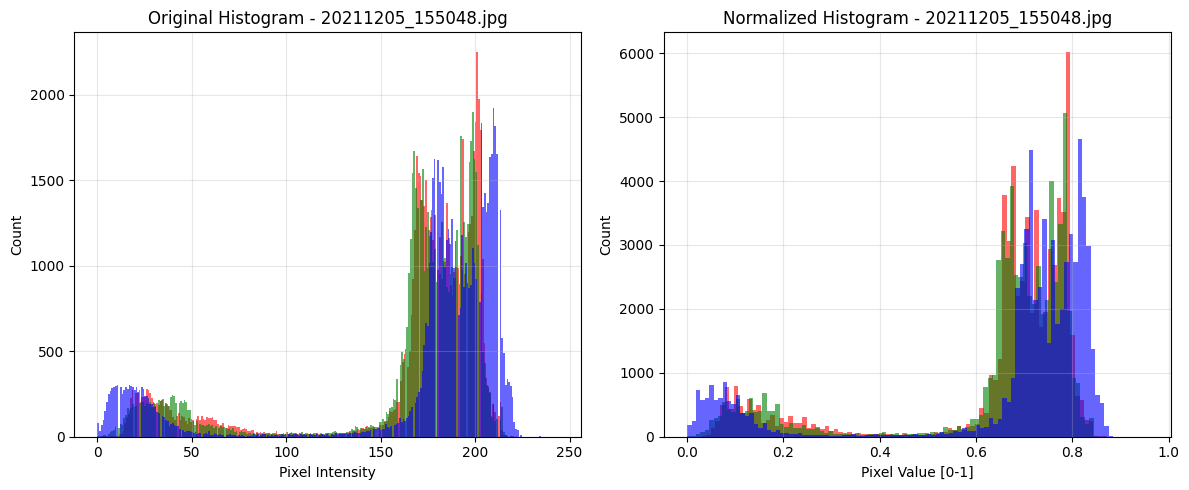

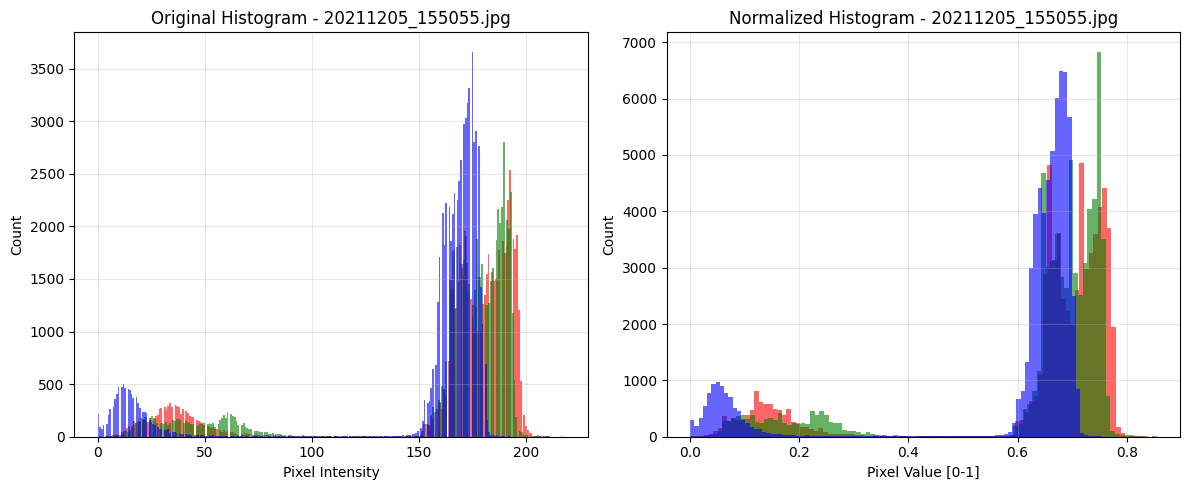

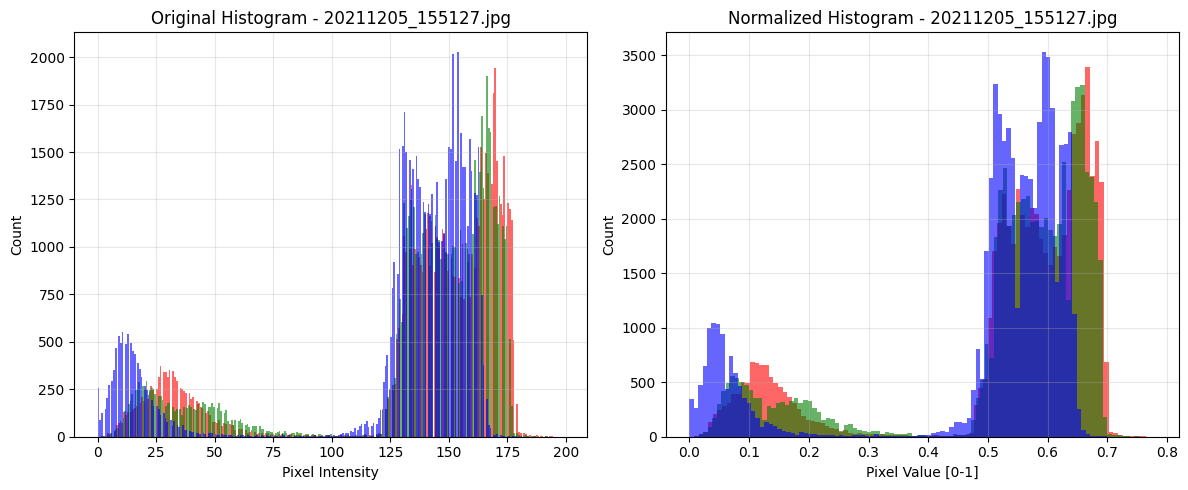

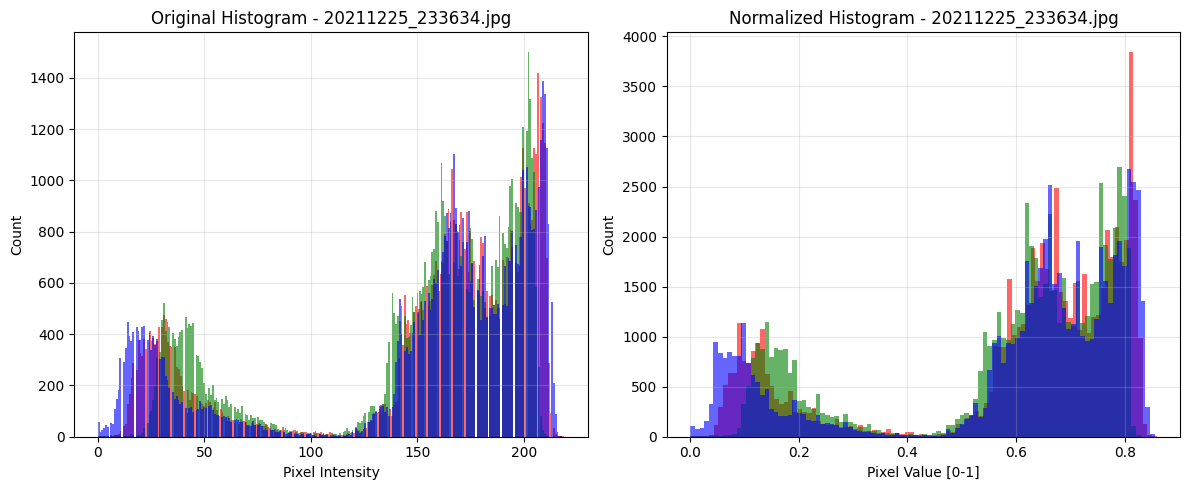

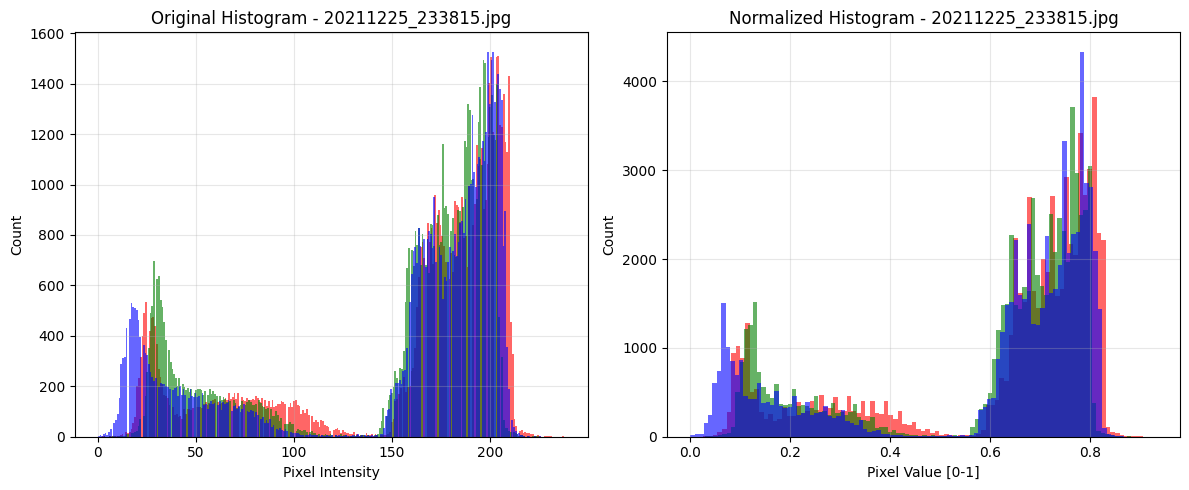

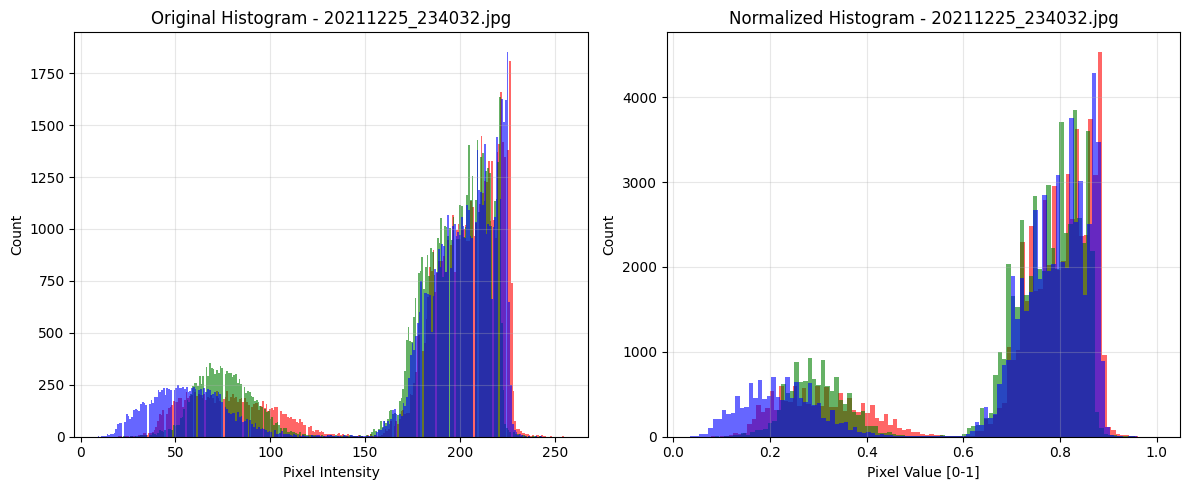

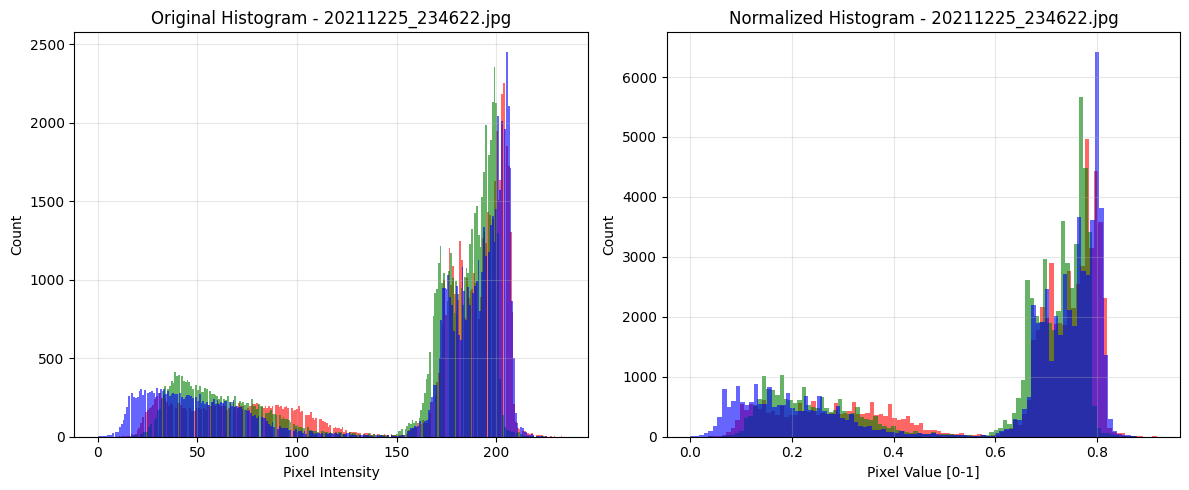

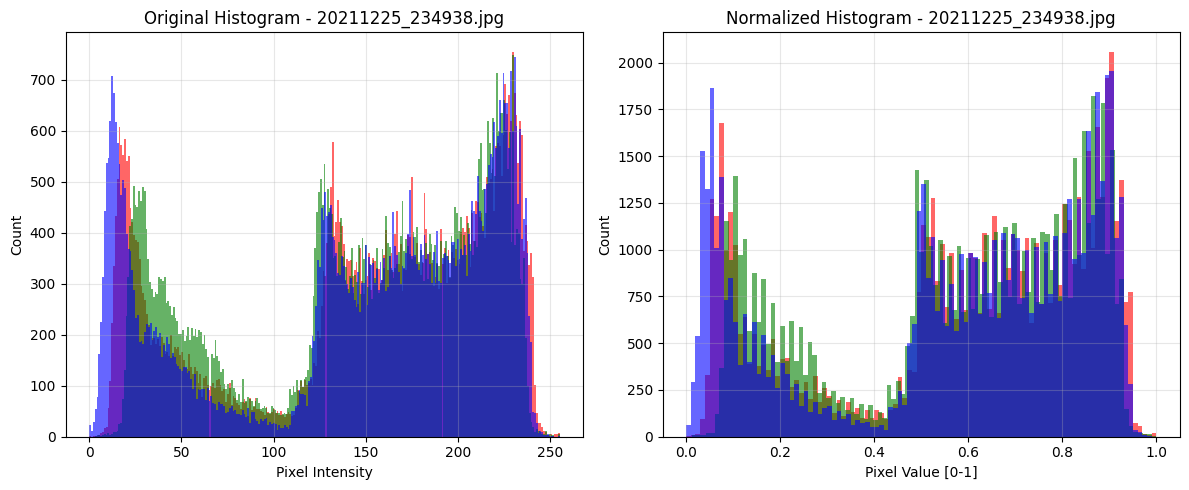

In [24]:
print("\nVisualizing pixel distributions before and after normalization...")

for category in list(normalized_images.keys())[:3]:  # Show 3 categories max
    for file, original, normalized in normalized_images[category]:
        plt.figure(figsize=(12, 5))

        # Original image histogram
        plt.subplot(1, 2, 1)
        for i, color in enumerate(('r', 'g', 'b')):
            plt.hist(original[:, :, i].ravel(), bins=256, color=color, alpha=0.6)
        plt.title(f"Original Histogram - {file}")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Count")
        plt.grid(True, alpha=0.3)

        # Normalized image histogram
        plt.subplot(1, 2, 2)
        for i, color in enumerate(('r', 'g', 'b')):
            plt.hist(normalized[:, :, i].ravel(), bins=100, color=color, alpha=0.6)
        plt.title(f"Normalized Histogram - {file}")
        plt.xlabel("Pixel Value [0-1]")
        plt.ylabel("Count")
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()


In [25]:
print("\n" + "=" * 50)
print("NORMALIZATION SUMMARY")
print("=" * 50)
print(f"Sample images normalized from {len(valid_categories)} categories.")
print("Pixel values scaled from [0–255] to [0–1].")
print("Normalization helps improve model training performance.")
print("=" * 50)



NORMALIZATION SUMMARY
Sample images normalized from 6 categories.
Pixel values scaled from [0–255] to [0–1].
Normalization helps improve model training performance.
